Plots: FitInterferometerPlotter
===============================

This example illustrates how to plot an `FitInterferometer` object using an `FitInterferometerPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import numpy as np
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets load example interferometer of of a strong lens as an `Interferometer` object.

In [2]:
dataset_name = "mass_sie__source_sersic"
dataset_path = path.join("dataset", "interferometer", dataset_name)

real_space_mask = al.Mask2D.circular(
    shape_native=(200, 200), pixel_scales=0.05, radius=3.0
)

interferometer = al.Interferometer.from_fits(
    visibilities_path=path.join(dataset_path, "visibilities.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    uv_wavelengths_path=path.join(dataset_path, "uv_wavelengths.fits"),
    real_space_mask=real_space_mask,
    settings=al.SettingsInterferometer(transformer_class=al.TransformerNUFFT),
)

We now mask the data and fit it with a `Tracer` to create a `FitInterferometer` object.

In [3]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0),
        einstein_radius=1.6,
        elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, angle=45.0),
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllSersic(
        centre=(0.1, 0.1),
        elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.8, angle=60.0),
        intensity=0.3,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.FitInterferometer(interferometer=interferometer, tracer=tracer)

We now pass the FitInterferometer to an `FitInterferometerPlotter` and call various `figure_*` methods 
to plot different attributes.

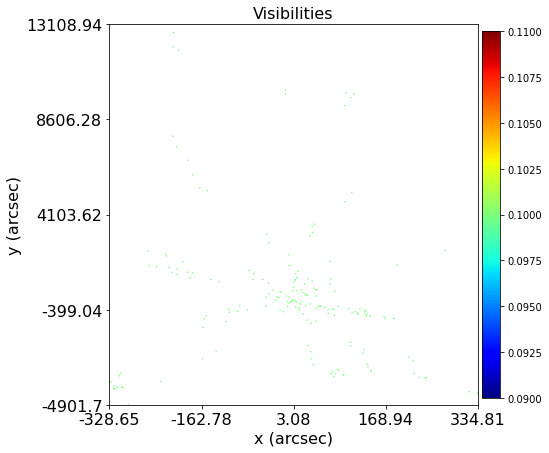

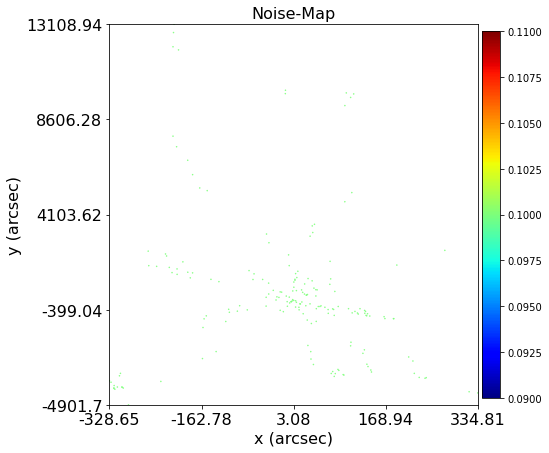

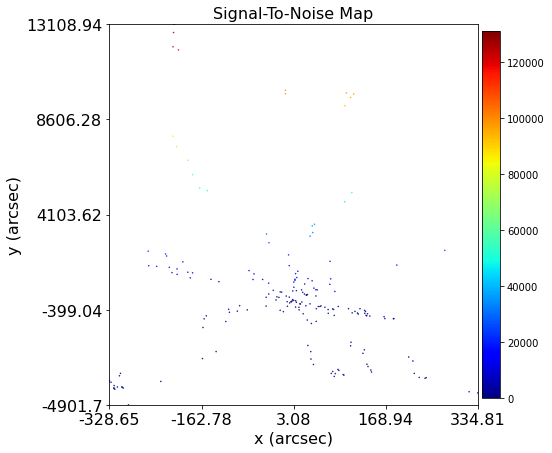

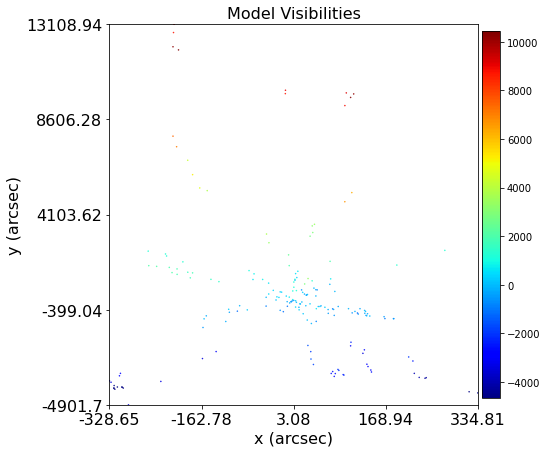

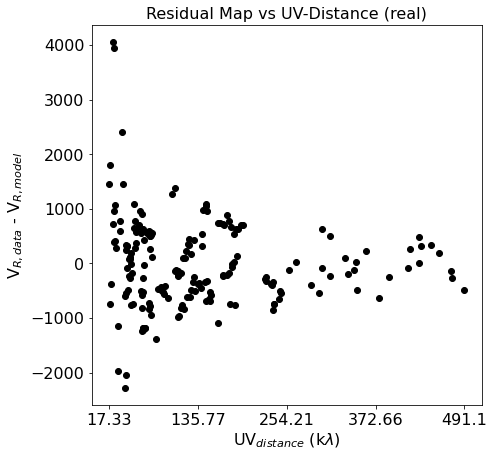

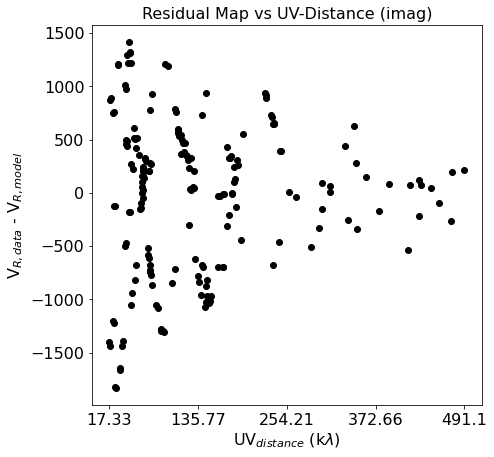

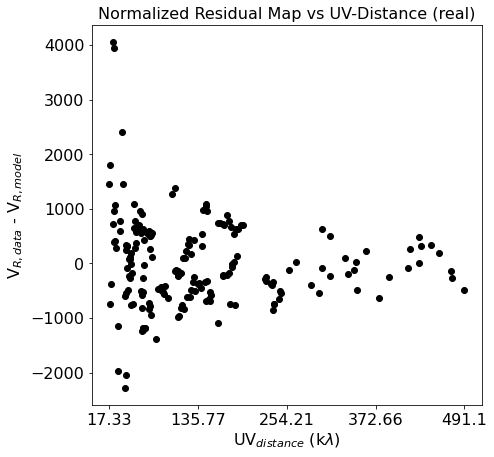

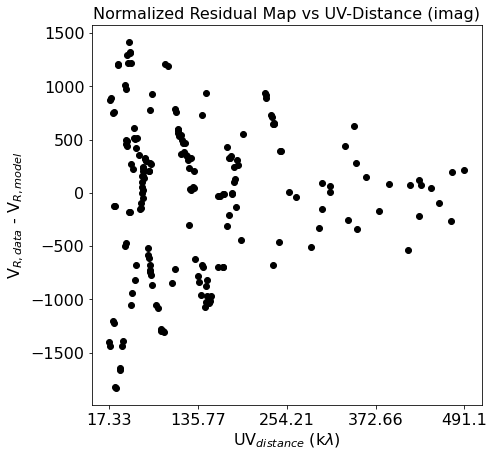

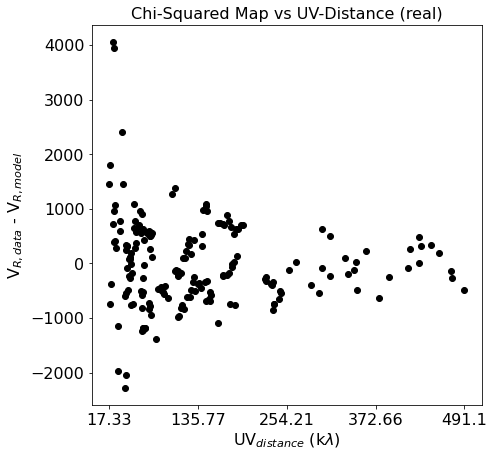

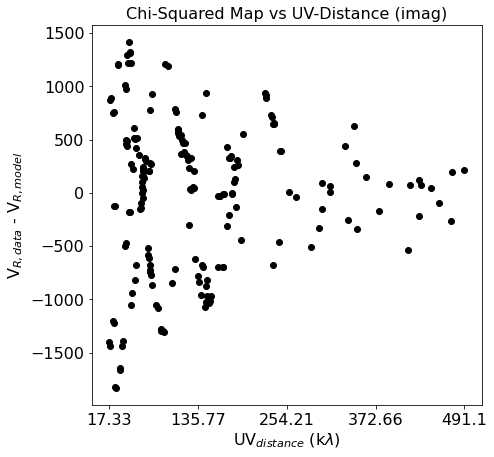

In [4]:
fit_interferometer_plotter = aplt.FitInterferometerPlotter(fit=fit)
fit_interferometer_plotter.figures_2d(
    visibilities=True,
    noise_map=True,
    signal_to_noise_map=True,
    model_visibilities=True,
    residual_map_real=True,
    residual_map_imag=True,
    normalized_residual_map_real=True,
    normalized_residual_map_imag=True,
    chi_squared_map_real=True,
    chi_squared_map_imag=True,
)

The `FitInterferometerPlotter` may also plot a subplot of these attributes.

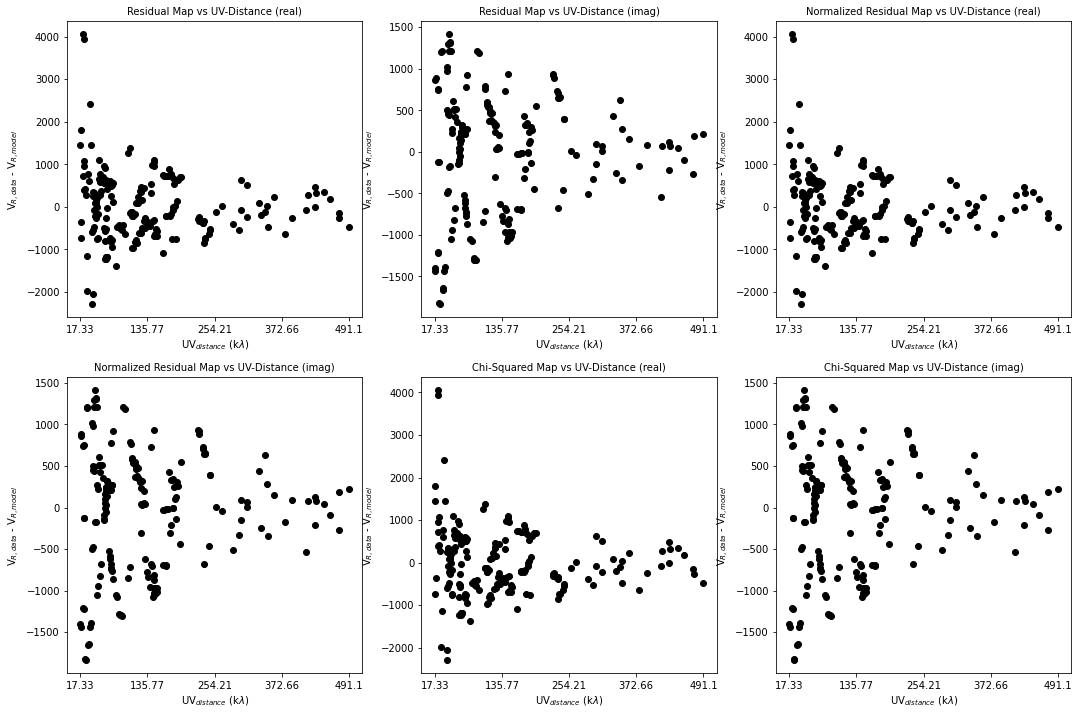

In [5]:
fit_interferometer_plotter.subplot_fit_interferometer()

The dirty images of the interferometer fit can also be plotted, which use the transformer of the interferometer 
to map the visibilities, noise-map, residual-map or other quantitiy to a real-space image.

Bare in mind the fit itself uses the visibilities and not the dirty images, so these images do not provide a direct
visualization of the fit itself. However, they are easier to inspect than the fits plotted above which are in Fourier
space and make it more straight forward to determine if an unphysical lens model is being fitted.

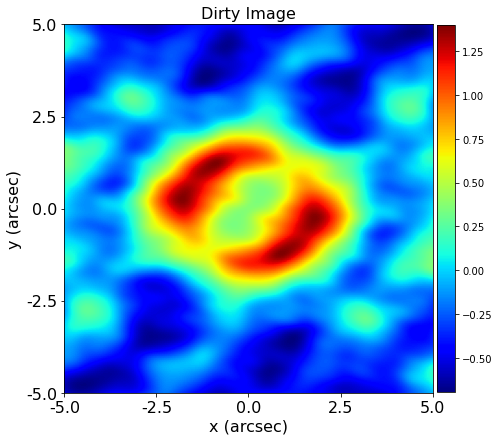

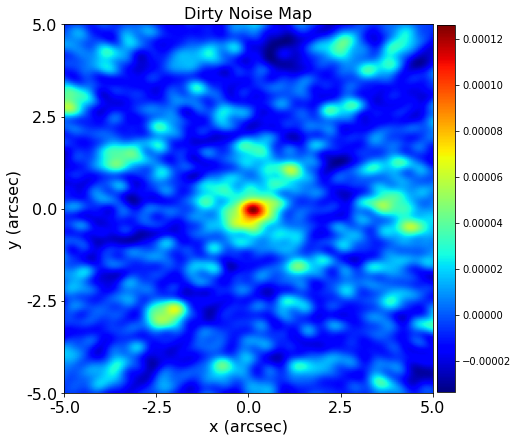

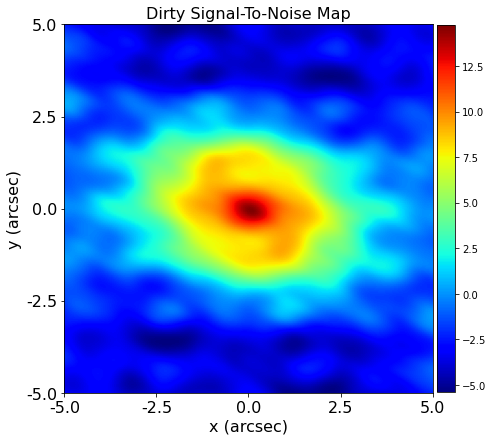

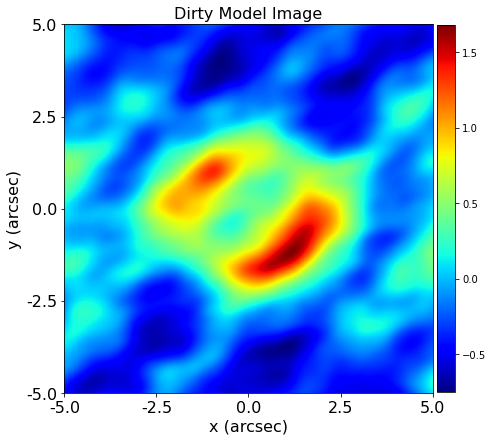

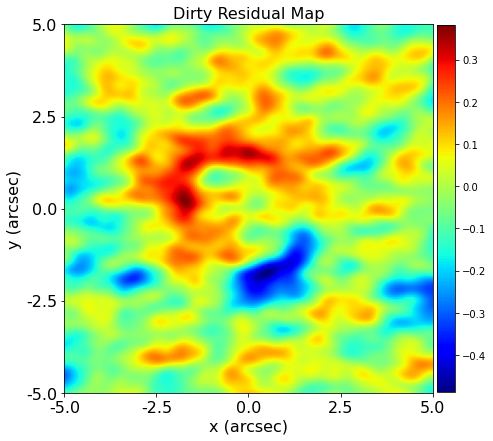

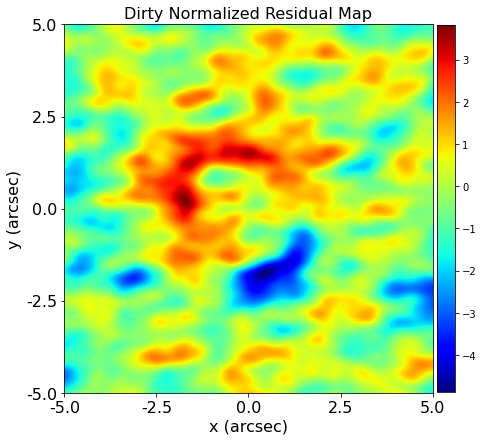

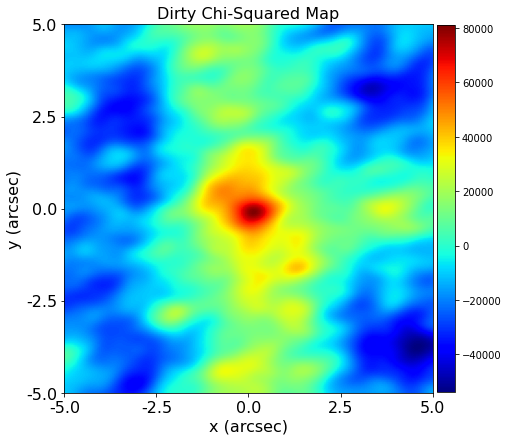

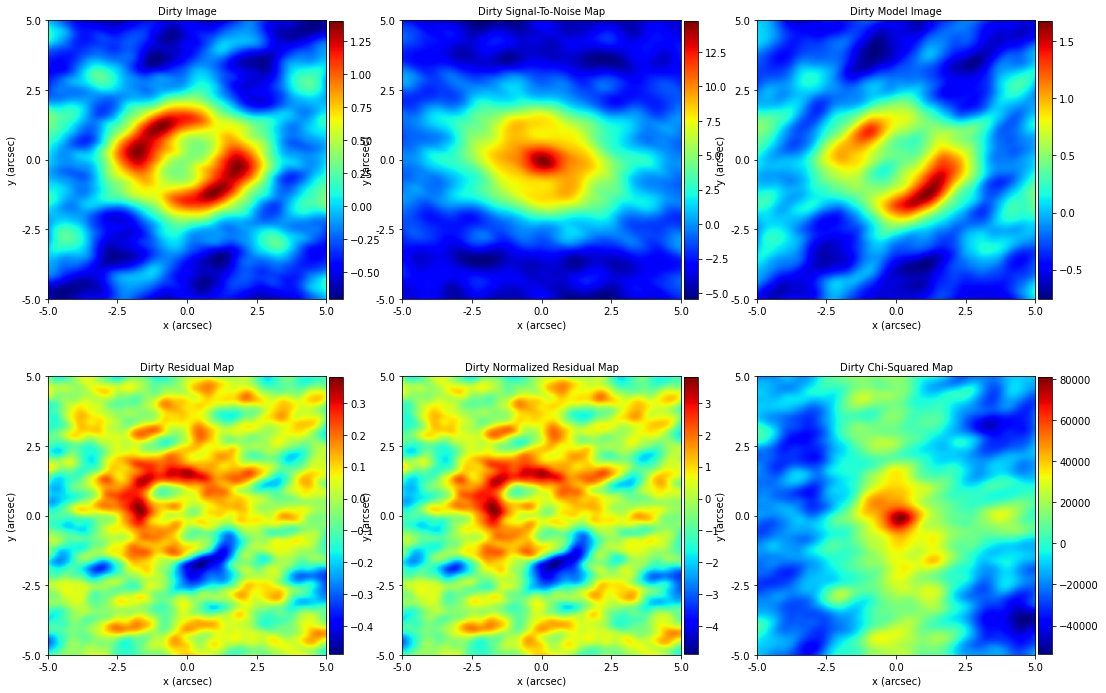

In [6]:
fit_interferometer_plotter.figures_2d(
    dirty_image=True,
    dirty_noise_map=True,
    dirty_signal_to_noise_map=True,
    dirty_model_image=True,
    dirty_residual_map=True,
    dirty_normalized_residual_map=True,
    dirty_chi_squared_map=True,
)
fit_interferometer_plotter.subplot_fit_dirty_images()

It can plot of the image of an input plane, where this image is the real-space image of the `Tracer`.

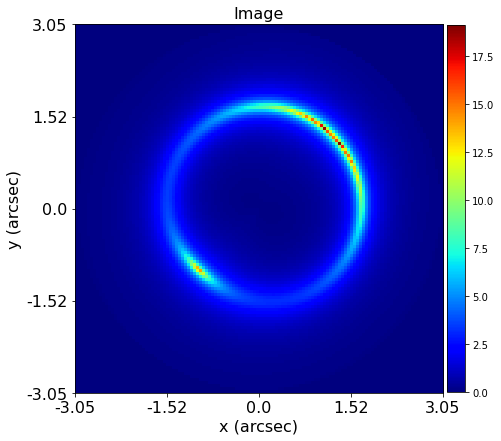

In [7]:
fit_interferometer_plotter.figures_2d(image=True)

It can also plot the plane-image of a plane, that is what the source galaxy looks like without lensing (e.g. 
for `plane_index=1` this is the source-plane image)

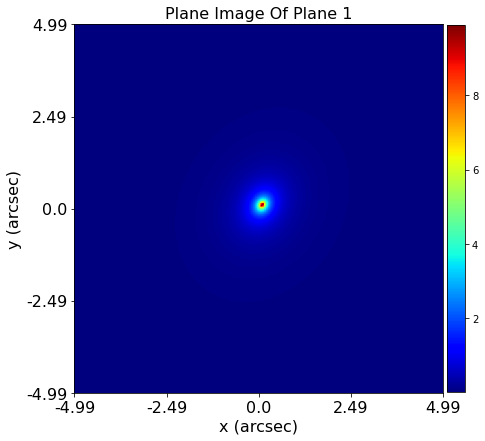

In [8]:
fit_interferometer_plotter.figures_2d_of_planes(plane_image=True, plane_index=0)
fit_interferometer_plotter.figures_2d_of_planes(plane_image=True, plane_index=1)

These can be combined to plot the appearance of the galaxy in real-space.

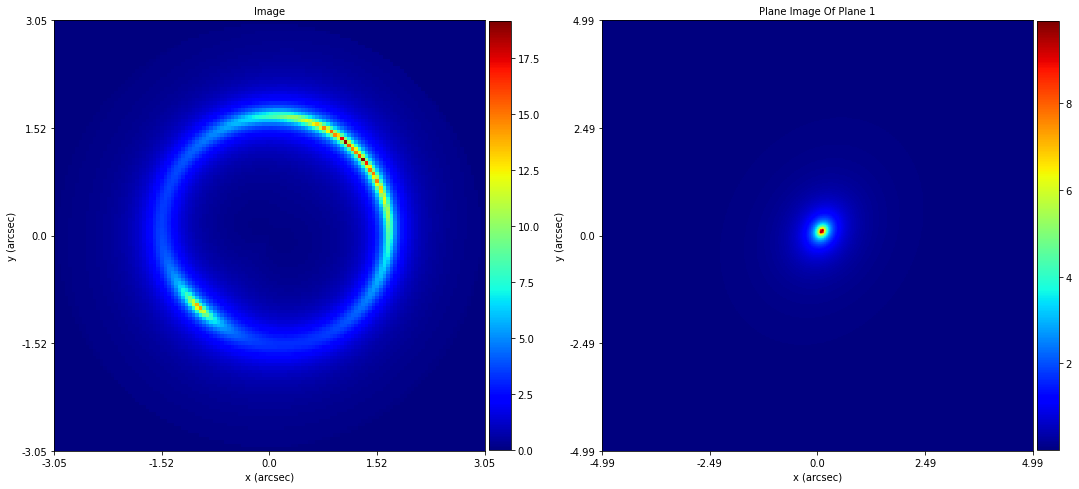

In [9]:
fit_interferometer_plotter.subplot_fit_real_space()

Finish.